<a href="https://colab.research.google.com/github/yycf0112/yyc.github.io/blob/main/predictive_modeling_booking_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Latest/booking.csv')

In [ ]:
df.shape[0]

2141

# 3.2 Data Preprocessing

## 3.2.1 Data Cleansing and handling missing values

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'links'])
df['price'] = df['price'].str.replace('€', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['reviews'] = df['reviews'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

In [ ]:
# Drop the 'free_wifi' column and remove rows with missing 'room_type'
df = df.drop(columns=['free_wifi'])
df = df.dropna(subset=['room_type'])

In [ ]:
# Fill missing values with the median for selected columns
columns_to_fill = ['reviews', 'rate', 'staff', 'facilities', 'cleanliness', 'comfort', 'value_of_money', 'location']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].median())

<ipython-input-7-c8857bfc379d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [ ]:
# Check for columns with null values
null_columns = df.isnull().sum()

# Display only columns that have null values
null_columns[null_columns > 0]

,0


In [ ]:
# Show all distinct values in the 'room_type' column
distinct_values = df['room_type'].unique()
print(distinct_values)

['Standard Double Room' 'Cozy Room' 'Classic Double Room' 'Double Room'
 'Patio Classic Double Room' 'Superior Double Room' 'Comfort Room'
 'Single Room' 'Small Classic Double Room' 'Double Room " La Chambre"'
 'Classic Room' 'Superior Room' 'Classic Double Room - Les Pop'
 'Classic Room without elevator' 'Superior Room with Spa & Fitness Access'
 'Double Room - Disability Access - Ground Floor' 'Studio (2 Adults)'
 'Double or Twin Room' 'Standard Room' 'Traditional Double Room'
 'Duplex Room' 'Classic Double Room with Shower' 'Standard Twin Room'
 '"Cozy" Room' 'Twin Room' 'Classic Double Room with Courtyard View'
 'Classic Double or Twin Room' 'Studio with Balcony' 'Double Room "Cocon"'
 'Deluxe Double or Twin Room' 'Double Room Cabriole'
 'Standard Double Room with Massaging-Jet Shower' 'Superior Studio'
 'Two-Bedroom Apartment' 'Grand Superior Room' 'Standard Studio' 'Studio'
 'One-Bedroom Apartment' 'Three-Bedroom Apartment' 'Small Double Room'
 'Standard Double Room "Labyrinthe"'

In [ ]:
def refine_room_type(room):
    room = str(room).lower()  # Case insensitivity
    if 'double' in room or 'twin' in room:
        return 'Double/Twin Room'
    elif 'suite' in room or 'deluxe' in room or 'premium' in room:
        return 'Luxury Room (Suite/Deluxe/Premium)'
    elif 'apartment' in room:
        return 'Apartment'
    elif 'studio' in room:
        return 'Studio'
    else:
        return 'Other'

df['refined_room_type'] = df['room_type'].apply(refine_room_type)

# Check the new refined room types
print(df['refined_room_type'].value_counts())

refined_room_type
Double/Twin Room                      1068
Apartment                              690
Other                                  206
Studio                                 137
Luxury Room (Suite/Deluxe/Premium)      39
Name: count, dtype: int64


<ipython-input-10-1608f8b1756e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['refined_room_type'] = df['room_type'].apply(refine_room_type)


## 3.2.2 Categorical Encoding

In [ ]:
# Step 1: One-Hot Encode Categorical Variables (e.g., 'property_type', 'Star', 'room_type', 'address', 'refined_room_type')
df_encoded = pd.get_dummies(df, columns=['property_type', 'Star', 'address', 'refined_room_type'], drop_first=False)

In [ ]:
# Step 1: Select relevant columns for correlation analysis (numeric columns, including log-transformed ones)
relevant_columns = ['price_log', 'reviews_log'] + [
    col for col in df_encoded.columns if 'address_' in col
    or 'Star_' in col
    or 'property_type_' in col
    or 'refined_room_type_' in col
]

#3.3 Data Analysis

## 3.3.1 Distribution of Numerical Variables

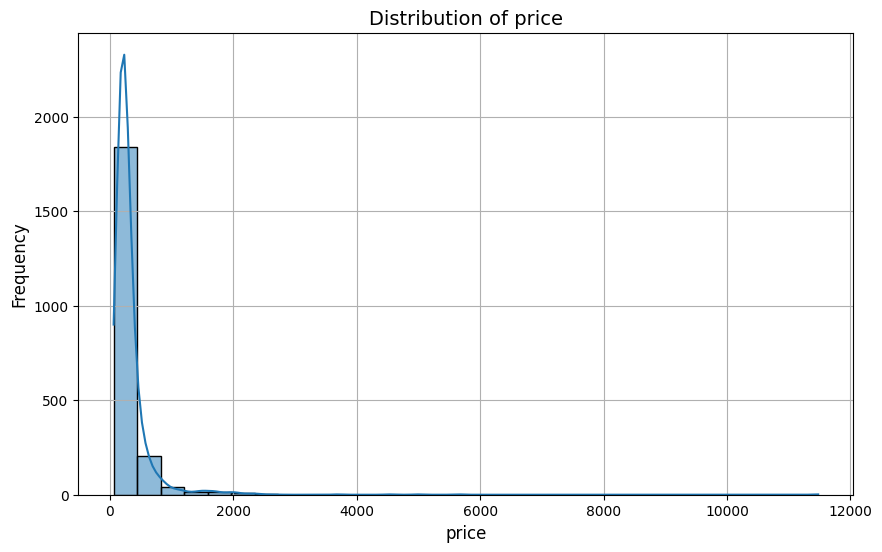

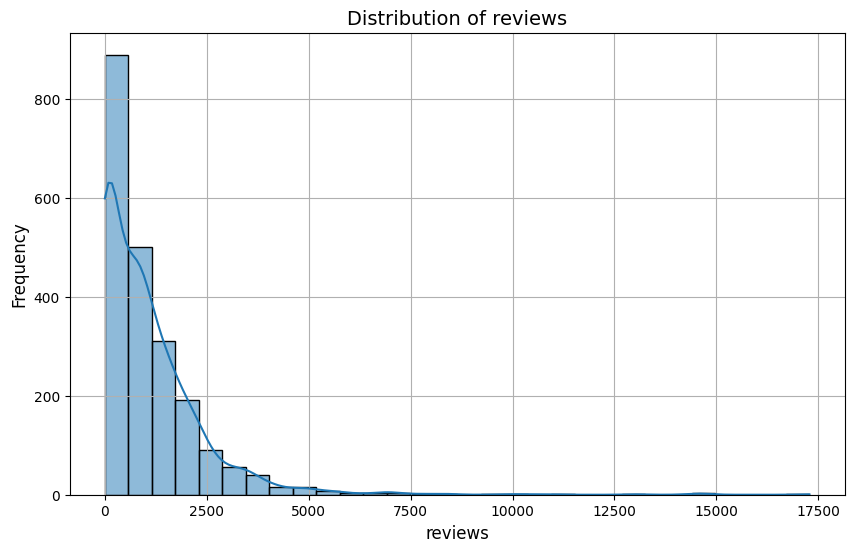

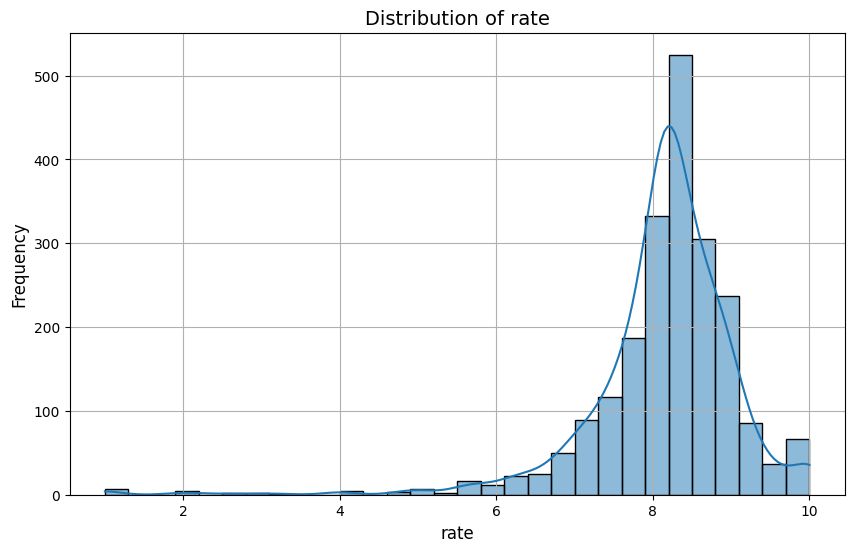

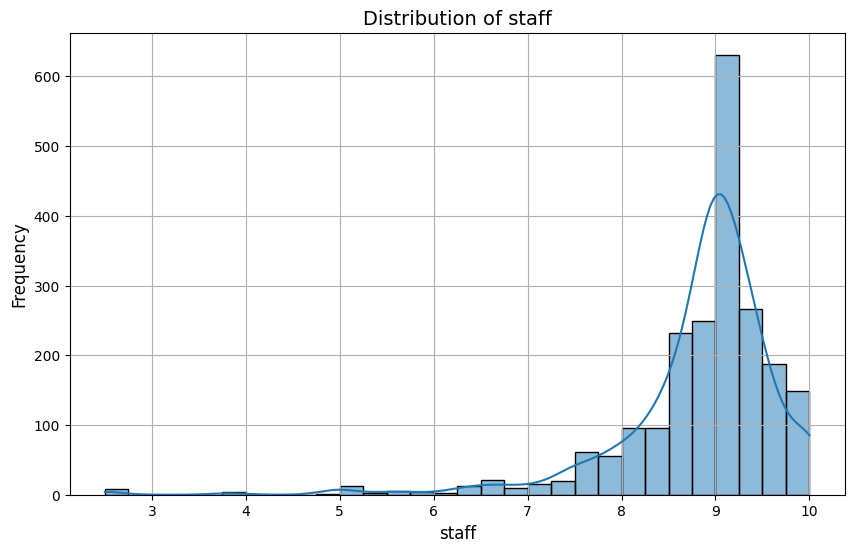

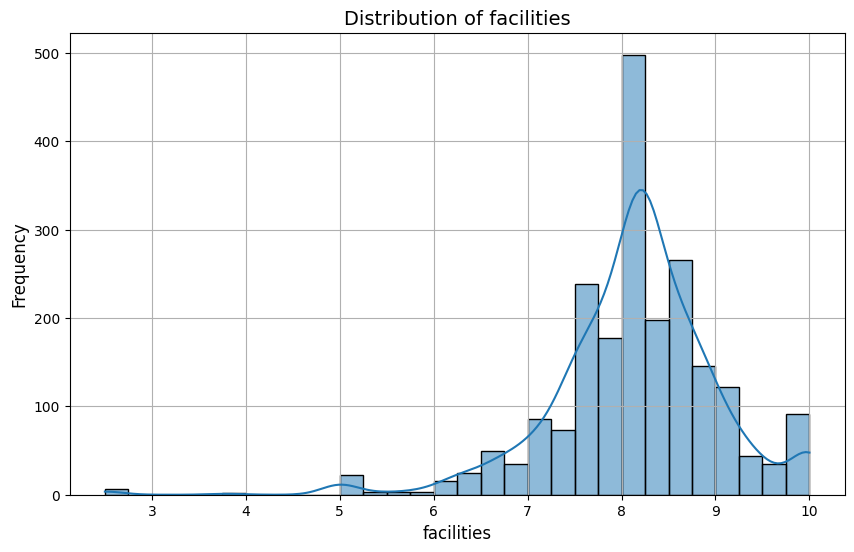

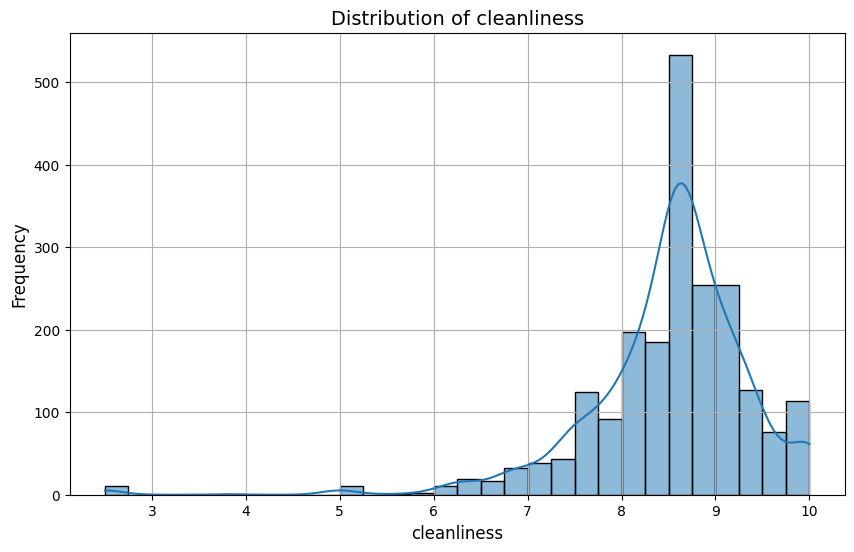

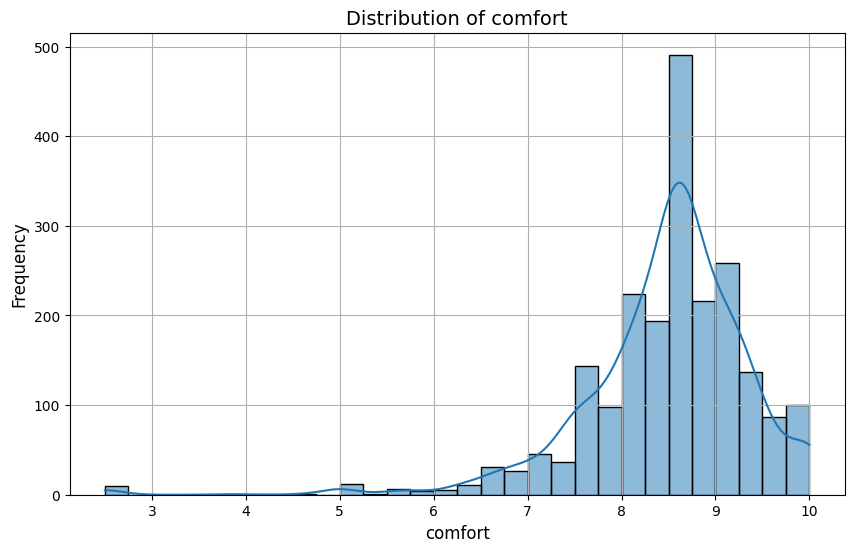

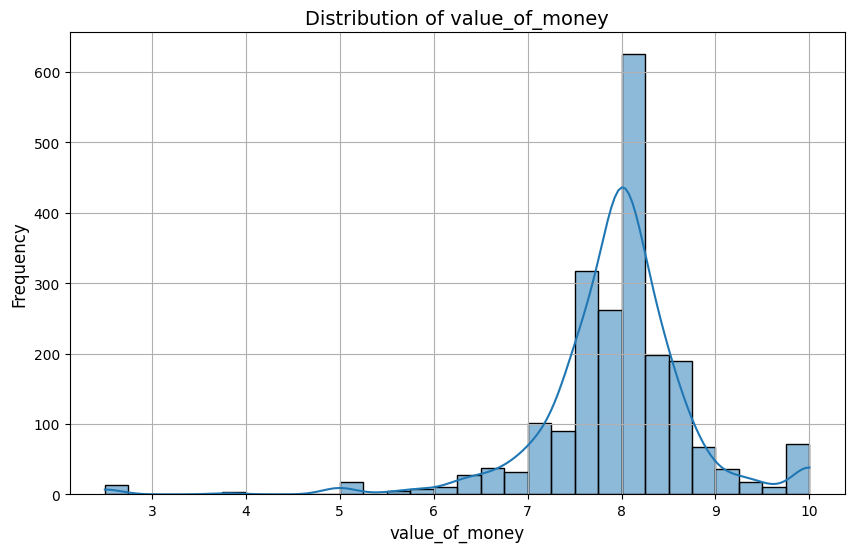

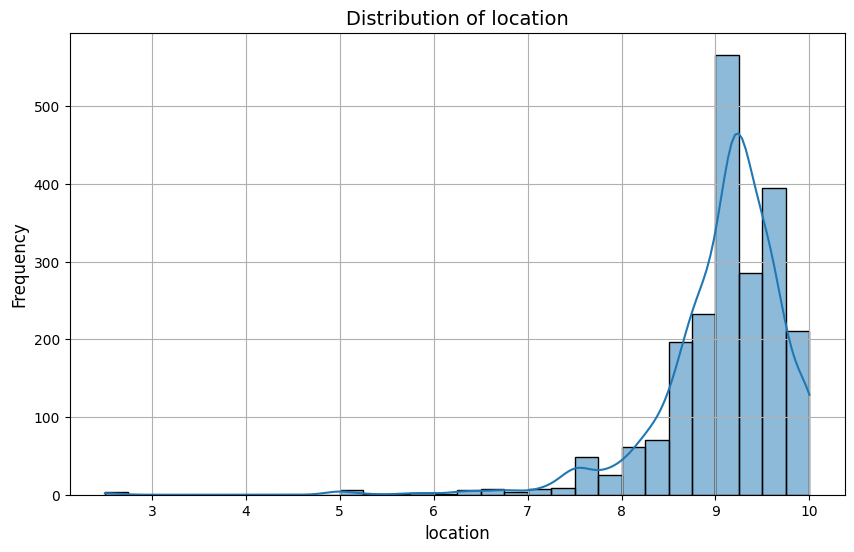

In [ ]:
# List of columns to exclude (binary and non-numerical columns)
exclude_columns = ['hotel_name', 'property_type', 'address', 'Star', 'Non-smoking rooms', 'Breakfast',
                   'Lift', 'Luggage storage', 'Heating', 'Family rooms', 'Daily housekeeping',
                   'Tea/Coffee Maker in All Rooms', 'Room service', 'Air conditioning',
                   'Private Parking', 'Airport shuttle', 'refined_room_type']

# Step 1: Select only numerical columns and exclude specific ones
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns_excluding = [col for col in numerical_columns if col not in exclude_columns]

# Plotting the distribution for each numerical column excluding specific ones
for column in numerical_columns_excluding:
    if df[column].isnull().all():  # Skip columns that are entirely NaN
        continue

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True, bins=30)  # Drop NaNs for plotting
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

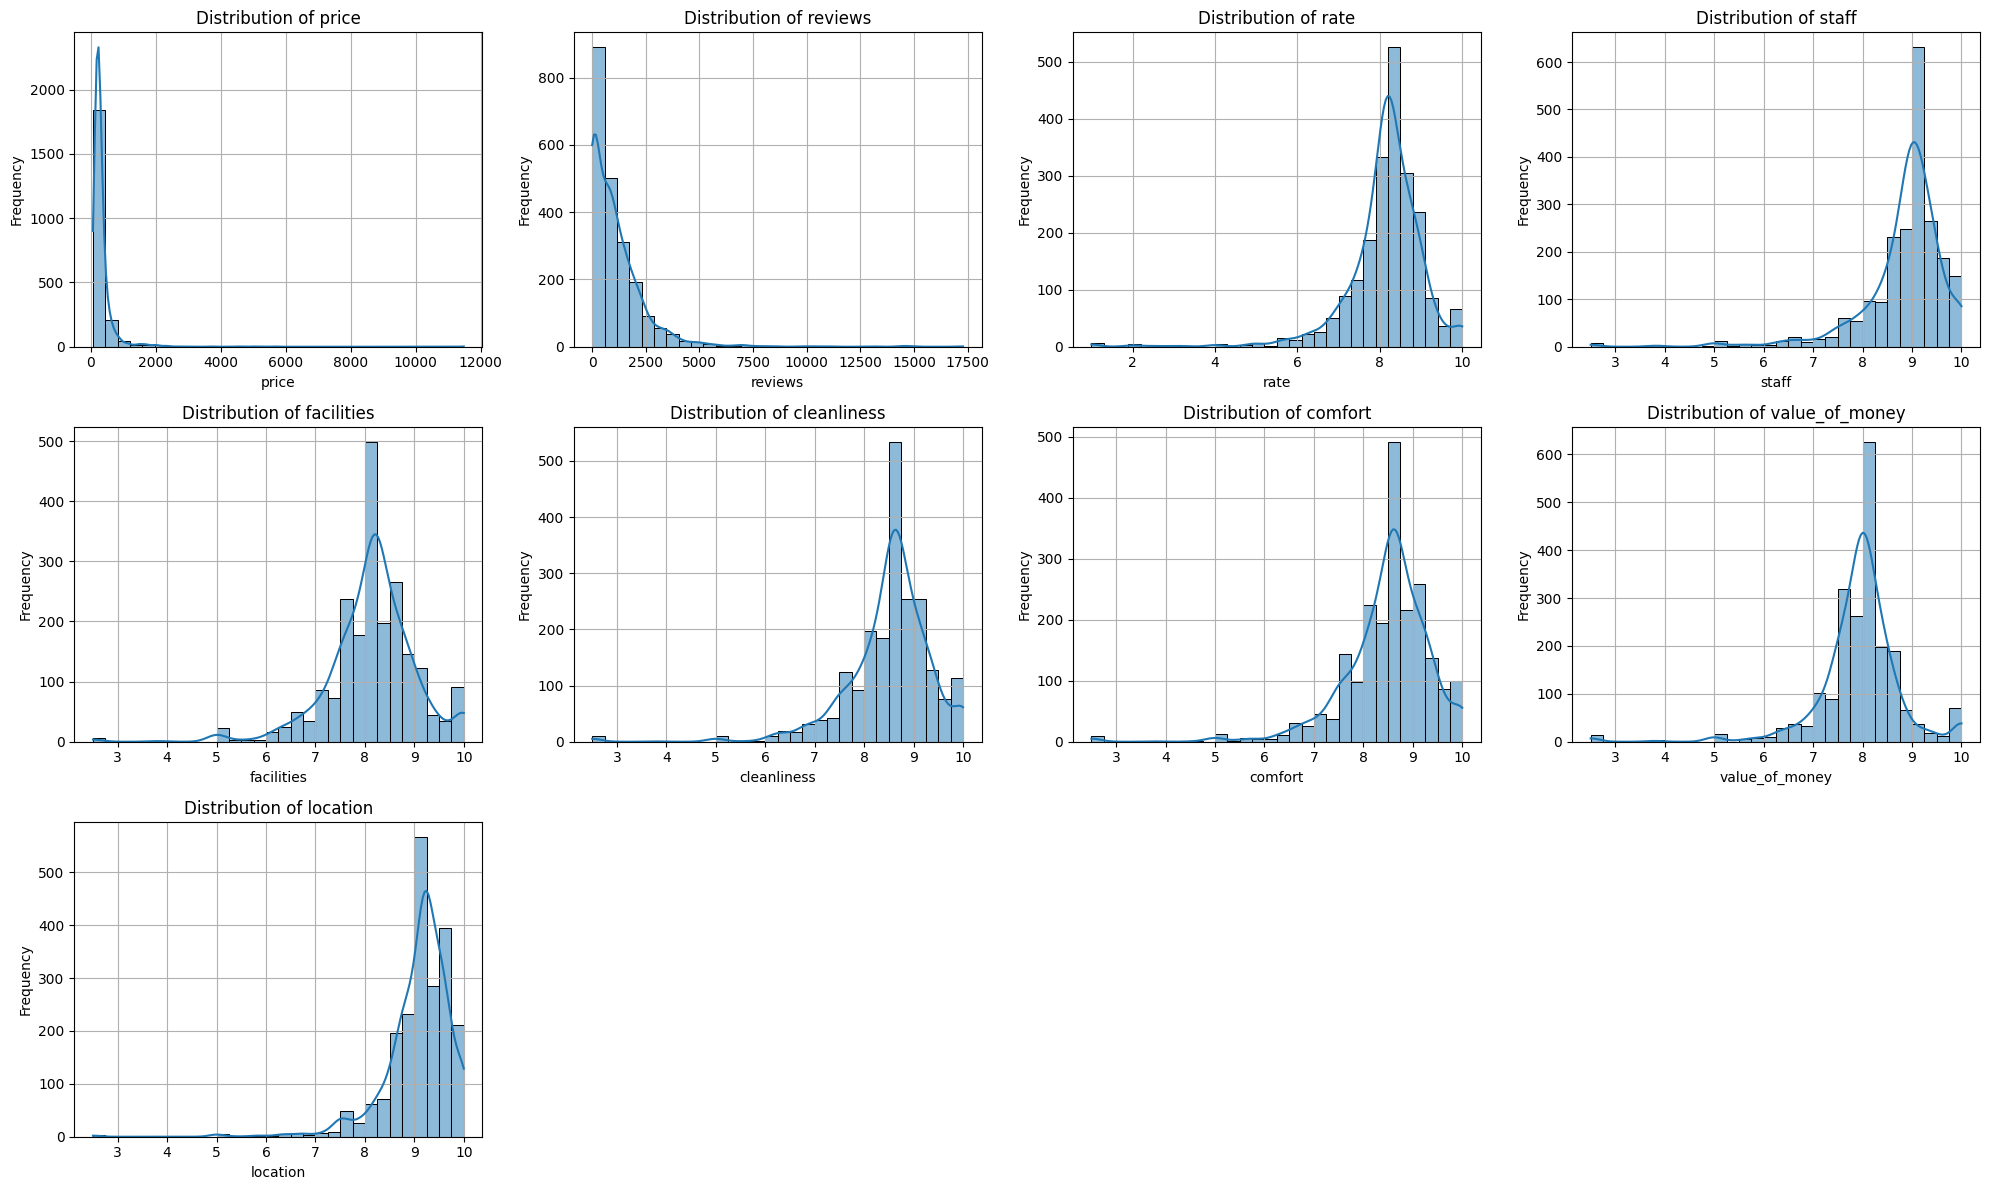

In [ ]:
# Set up the subplot grid
num_columns = len(numerical_columns_excluding)
num_rows = (num_columns + 3) // 4  # Calculate rows based on 4 columns per row

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 4))
axes = axes.flatten()  # Flatten the array of axes for easy indexing

for i, column in enumerate(numerical_columns_excluding):
    if df[column].isnull().all():  # Skip columns that are entirely NaN
        continue

    sns.histplot(df[column].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True)

# Turn off any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df[numerical_columns_excluding].describe()

,price,reviews,rate,staff,facilities,cleanliness,comfort,value_of_money,location
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,324.181308,1072.555140,8.123645,8.825093,8.131682,8.504206,8.471729,7.936215,9.078224
std,410.485798,1379.261451,0.978933,0.896370,0.913688,0.891202,0.914130,0.860722,0.698889
min,62.000000,1.000000,1.000000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
25%,178.000000,60.750000,7.800000,8.600000,7.700000,8.200000,8.100000,7.600000,8.800000
50%,233.000000,762.000000,8.200000,9.000000,8.200000,8.600000,8.600000,8.000000,9.200000
75%,334.000000,1525.000000,8.600000,9.300000,8.600000,9.000000,9.000000,8.300000,9.500000
max,11477.000000,17281.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 3.3.2 Skewness analysis of numerical variables and log tranformation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dictionary to store skewness values
skewness_dict = {}

# Step 2: Calculate skewness for each numerical column (excluding specific columns)
print("Skewness of numerical columns:")
for column in numerical_columns_excluding:
    skewness = df[column].skew()
    skewness_dict[column] = skewness
    print(f"Skewness of '{column}': {skewness}")

# Optionally, print skewness values greater than 1 (highly skewed columns)
print("\nHighly skewed columns (skewness > 1 or skewness < -1):")
for column, skewness in skewness_dict.items():
    if abs(skewness) > 1:
        print(f"{column}: {skewness}")

Skewness of numerical columns:
Skewness of 'price': 12.97862589370867
Skewness of 'reviews': 3.9011797368870953
Skewness of 'rate': -2.5188668661799447
Skewness of 'staff': -2.7536006481399724
Skewness of 'facilities': -1.2108683583646735
Skewness of 'cleanliness': -2.0272093456604035
Skewness of 'comfort': -1.954100351312435
Skewness of 'value_of_money': -1.7419667410855892
Skewness of 'location': -2.670906248135411

Highly skewed columns (skewness > 1 or skewness < -1):
price: 12.97862589370867
reviews: 3.9011797368870953
rate: -2.5188668661799447
staff: -2.7536006481399724
facilities: -1.2108683583646735
cleanliness: -2.0272093456604035
comfort: -1.954100351312435
value_of_money: -1.7419667410855892
location: -2.670906248135411


In [ ]:
# Apply log transformation to 'price' and 'reviews'
df['price_log'] = np.log1p(df['price'])  # log1p handles zero values by using log(1 + x)
df['reviews_log'] = np.log1p(df['reviews'])

## 3.3.3 Distribution of Categorical Variables

In [ ]:
df['property_type'].value_counts()
# 1 = hotel ; 0 = apartment

,count
property_type,
1,1268
0,872


<ipython-input-19-d35ba99b8abb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_type_labels, y=property_type_counts.values, palette='viridis')


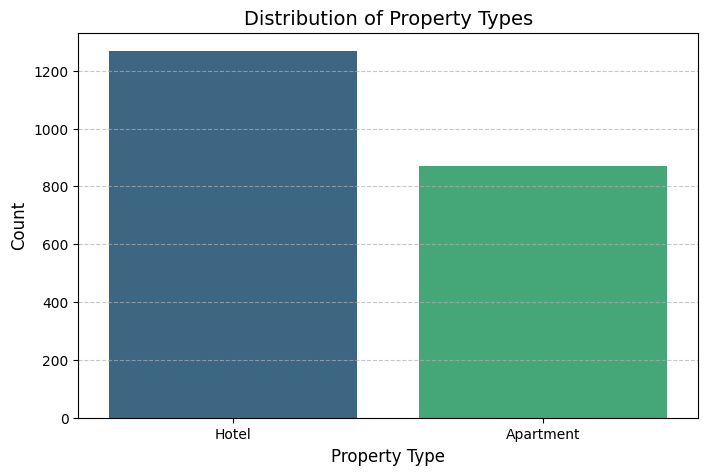

In [ ]:
# Count the occurrences of each property type
property_type_counts = df['property_type'].value_counts()

# Define labels for clarity
property_type_labels = ['Hotel', 'Apartment']

# Plot the distribution as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=property_type_labels, y=property_type_counts.values, palette='viridis')
plt.title('Distribution of Property Types', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-20-1790d0ceb927>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')


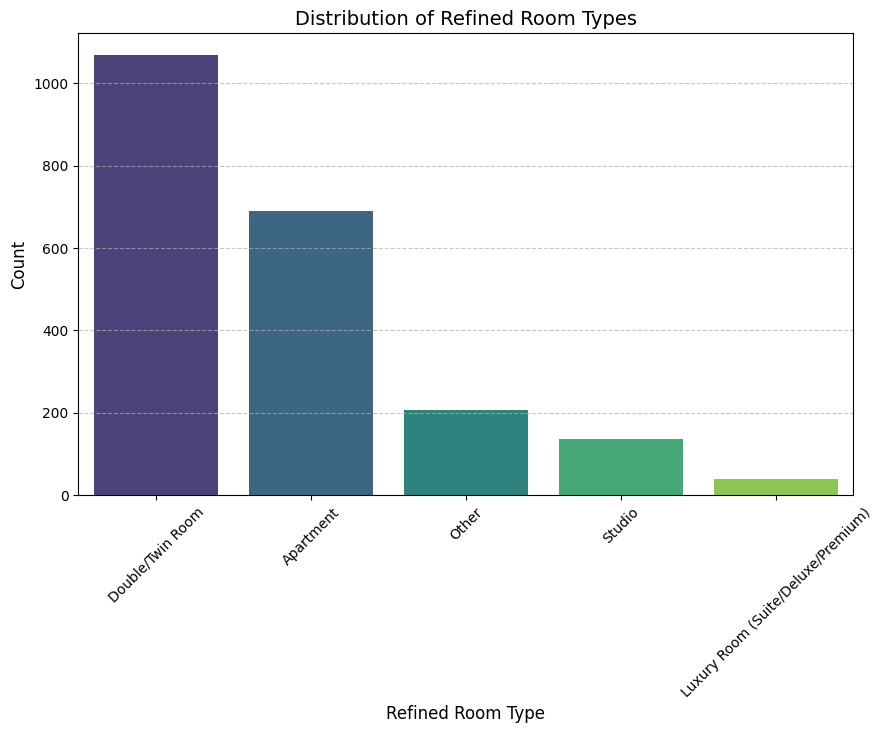

In [ ]:
# Count the occurrences of each refined room type
room_type_counts = df['refined_room_type'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Distribution of Refined Room Types', fontsize=14)
plt.xlabel('Refined Room Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

    Arrondissement  Number of Hotels and Apartments
0                9                              196
1                8                              190
2               15                              173
3               16                              153
4               17                              144
5               10                              136
6                5                              117
7               11                              109
8               18                              108
9                6                               98
10              14                               95
11               1                               94
12               7                               87
13              12                               85
14               2                               80
15               4                               66
16              13                               65
17               3                               60
18          

<ipython-input-21-979aebd38bf0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=address_counts.index, y=address_counts.values, palette="viridis")


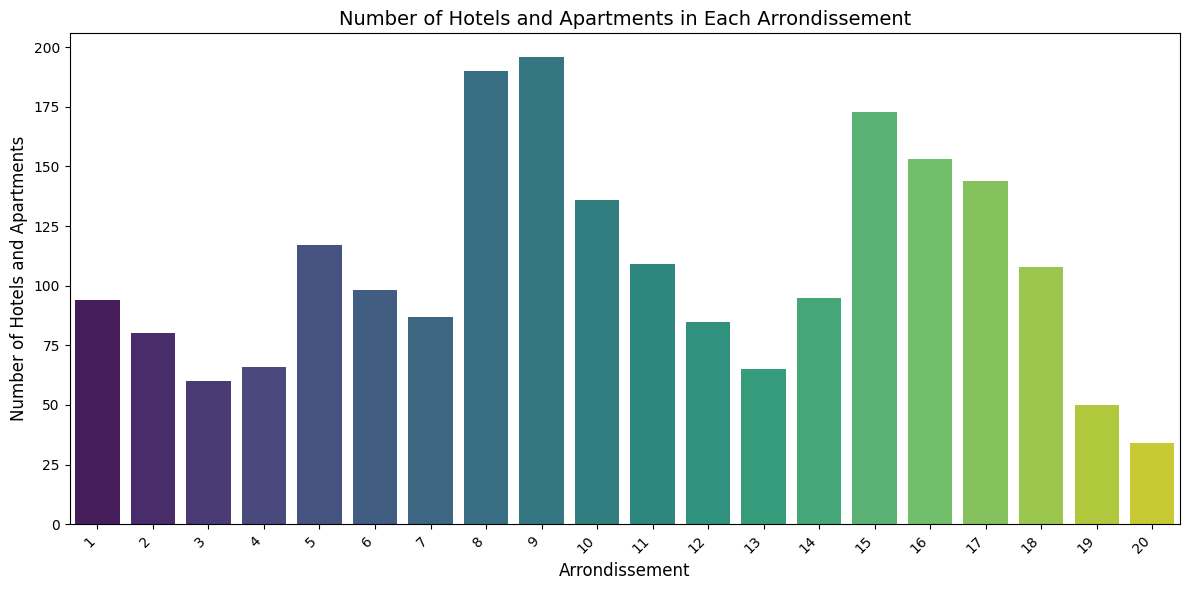

In [ ]:
# Count the number of hotels in each arrondissement
address_counts = df['address'].value_counts()

# Create a DataFrame for better visualization and display
address_df = pd.DataFrame({
    'Arrondissement': address_counts.index,
    'Number of Hotels and Apartments': address_counts.values
})

# Display the DataFrame as a table
print(address_df)

# Plotting the counts
plt.figure(figsize=(12, 6))
sns.barplot(x=address_counts.index, y=address_counts.values, palette="viridis")

# Adjusting title and labels
plt.title('Number of Hotels and Apartments in Each Arrondissement', fontsize=14)
plt.xlabel('Arrondissement', fontsize=12)
plt.ylabel('Number of Hotels and Apartments', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Star
4    1031
3     876
2     114
5     108
1      11
Name: count, dtype: int64


<ipython-input-22-a4d749622fa6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Star', data=df, palette='coolwarm')


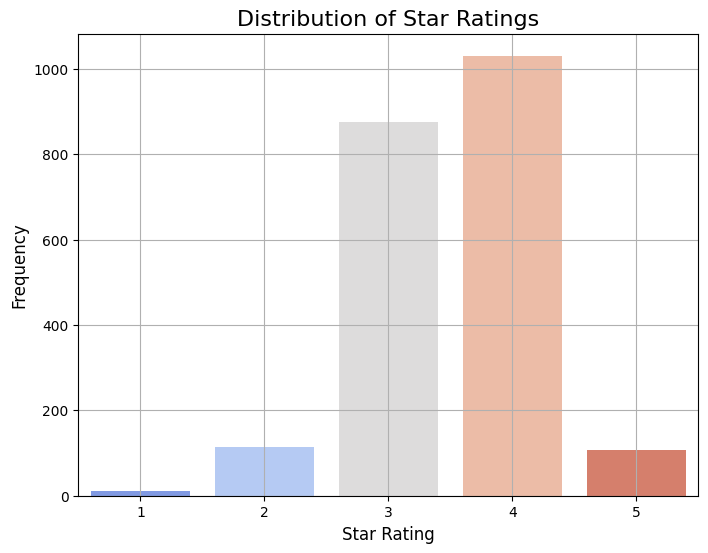

In [ ]:
# Count the number of hotels in each arrondissement
star_rating_counts = df['Star'].value_counts()
print(star_rating_counts)

# Plotting the distribution of Star Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Star', data=df, palette='coolwarm')
plt.title('Distribution of Star Ratings', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

## 3.3.4 Variance Inflation Factor (VIF)

In [ ]:
# Remove original 'price' and 'reviews' and add 'log_price' and 'log_reviews'
columns_for_vif = [col for col in numerical_columns_excluding if col not in ['price', 'reviews']]
columns_for_vif += ['reviews_log']  # Add log-transformed columns

# Create DataFrame for VIF calculation
vif_df = df[columns_for_vif]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = vif_df.columns
vif_data['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

# Step 6: Print VIF values
print(vif_data)

         Variable         VIF
0            rate  482.667562
1           staff  326.690248
2      facilities  578.474794
3     cleanliness  636.669804
4         comfort  576.304623
5  value_of_money  349.134089
6        location  147.656682
7     reviews_log    8.339424


## 3.3.5 Correlation Analysis

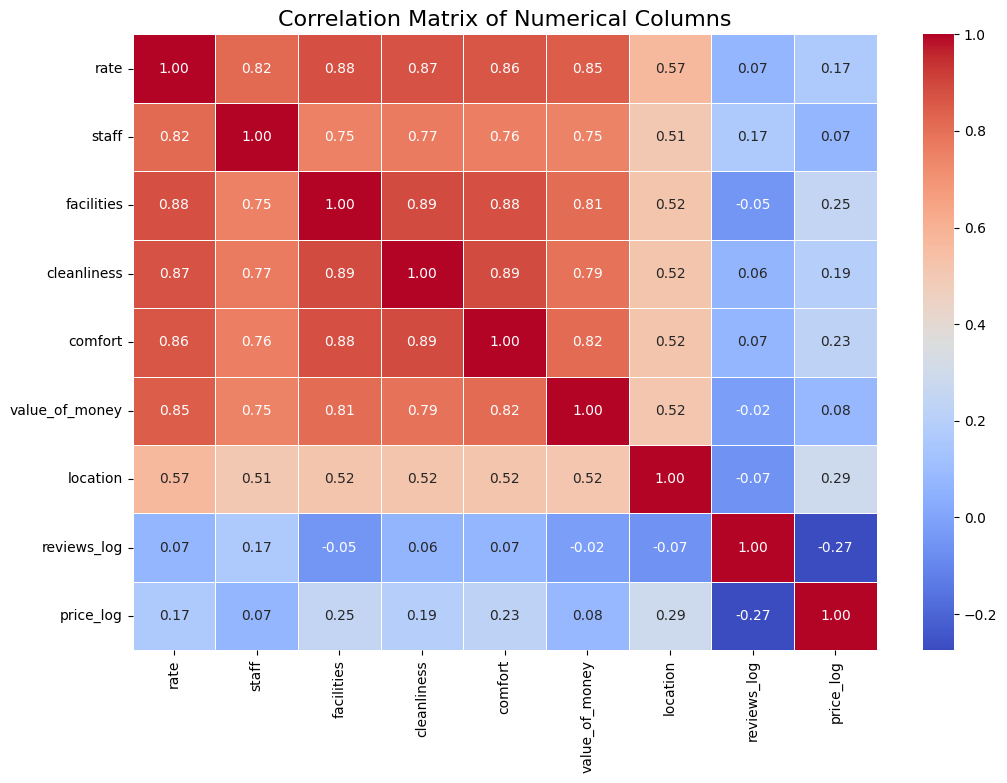

In [ ]:
columns_for_correlation_matrix = columns_for_vif + ['price_log']

# Create the correlation matrix for the numerical columns
correlation_matrix = df[columns_for_correlation_matrix].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.show()

## 3.3.6 Principal Component Analysis (PCA)

# 3.5 Methodology

## 3.5.1 Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Apply log transformation  'reviews'
df_encoded['reviews_log'] = np.log1p(df['reviews'])
df_encoded = df_encoded.drop(columns=['price', 'reviews', 'hotel_name', 'room_type'])

In [ ]:
df_encoded.columns

Index(['rate', 'staff', 'facilities', 'cleanliness', 'comfort',
       'value_of_money', 'location', 'Non-smoking rooms', 'Breakfast', 'Lift',
       'Luggage storage', 'Heating', 'Family rooms', 'Daily housekeeping',
       'Tea/Coffee Maker in All Rooms', 'Room service', 'Air conditioning',
       'Private Parking', 'Airport shuttle', 'property_type_0',
       'property_type_1', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Star_5',
       'address_1', 'address_2', 'address_3', 'address_4', 'address_5',
       'address_6', 'address_7', 'address_8', 'address_9', 'address_10',
       'address_11', 'address_12', 'address_13', 'address_14', 'address_15',
       'address_16', 'address_17', 'address_18', 'address_19', 'address_20',
       'refined_room_type_Apartment', 'refined_room_type_Double/Twin Room',
       'refined_room_type_Luxury Room (Suite/Deluxe/Premium)',
       'refined_room_type_Other', 'refined_room_type_Studio', 'reviews_log'],
      dtype='object')

# 4.1 Linear Regression Models

##  PCA and feature set

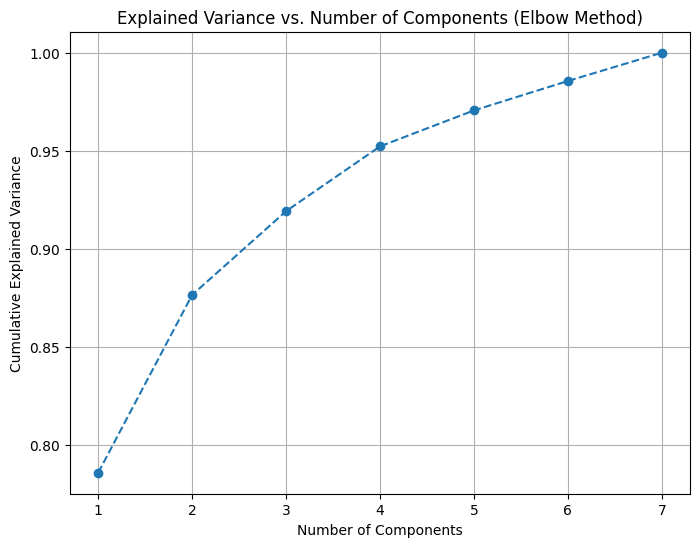

  Principal Component  Variance Explained (%)
0                 PC1               78.578716
1                 PC2                9.069176
2                 PC3                4.270137
3                 PC4                3.305485
4                 PC5                1.834464
5                 PC6                1.500399
6                 PC7                1.441624


In [ ]:
from sklearn.decomposition import PCA

# Assuming ratings are columns that we want to apply PCA
ratings = ['rate', 'staff', 'facilities', 'cleanliness', 'comfort', 'value_of_money', 'location']

# Standardize the data
scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(df_encoded[ratings])

# Fit PCA
pca = PCA()
pca.fit(ratings_scaled)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance to use the elbow method
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components (Elbow Method)')
plt.grid(True)
plt.show()

# Convert to percentages
explained_variance_percentage = explained_variance_ratio * 100

# Create a DataFrame for better visualization
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Variance Explained (%)': explained_variance_percentage
})

# Display the percentage variance explained by each component
print(explained_variance_df)

In [ ]:
# Apply PCA to reduce the category ratings to 3 principal components
pca = PCA(n_components=3)
ratings_pca = pca.fit_transform(ratings_scaled)

In [ ]:
# Get the PCA loadings (components)
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=ratings)

# Display the loadings (contributions of each feature to each principal component)
print(pca_loadings)

                     PC1       PC2       PC3
rate            0.405730 -0.063493  0.053614
staff           0.370293 -0.064728  0.865050
facilities      0.398087 -0.148885 -0.311712
cleanliness     0.398642 -0.148142 -0.248853
comfort         0.398002 -0.146493 -0.289817
value_of_money  0.383144 -0.096685  0.038016
location        0.275087  0.957527 -0.065438


In [ ]:
# Add the PCA components to the DataFrame
df_encoded['PC1'], df_encoded['PC2'], df_encoded['PC3'] = ratings_pca[:, 0], ratings_pca[:, 1], ratings_pca[:, 2]

# Drop the original category rating columns as they've been reduced to PC1, PC2, PC3
df_encoded.drop(columns=ratings, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Only include the relevant predictors (exclude target variable like price_log)
columns_for_vif = [col for col in ['reviews_log', 'PC1', 'PC2', 'PC3'] if col in df_encoded.columns]

# Step 2: Create DataFrame for VIF calculation
vif_df = df_encoded[columns_for_vif]  # Using df_encoded to calculate VIF

# Step 3: Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = vif_df.columns
vif_data['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

# Step 4: Print VIF values
print(vif_data)

      Variable       VIF
0  reviews_log  1.009831
1          PC1  1.000262
2          PC2  1.001763
3          PC3  1.007806


In [ ]:
# Define encoded columns
property_specific = [col for col in df_encoded.columns if 'address_' in col or 'Star_' in col or 'property_type_' in col or 'refined_room_type_' in col]
# Feature
facilities = ['Non-smoking rooms', 'Breakfast', 'Lift', 'Luggage storage', 'Heating',
                    'Family rooms', 'Daily housekeeping', 'Tea/Coffee Maker in All Rooms',
                    'Room service', 'Air conditioning', 'Private Parking', 'Airport shuttle']

feature_set = ['PC1', 'PC2', 'PC3', 'reviews_log'] + property_specific + facilities

In [ ]:
df.columns

Index(['hotel_name', 'property_type', 'price', 'reviews', 'address', 'Star',
       'rate', 'room_type', 'staff', 'facilities', 'cleanliness', 'comfort',
       'value_of_money', 'location', 'Non-smoking rooms', 'Breakfast', 'Lift',
       'Luggage storage', 'Heating', 'Family rooms', 'Daily housekeeping',
       'Tea/Coffee Maker in All Rooms', 'Room service', 'Air conditioning',
       'Private Parking', 'Airport shuttle', 'refined_room_type', 'price_log',
       'reviews_log'],
      dtype='object')

In [ ]:
df_encoded.columns

Index(['Non-smoking rooms', 'Breakfast', 'Lift', 'Luggage storage', 'Heating',
       'Family rooms', 'Daily housekeeping', 'Tea/Coffee Maker in All Rooms',
       'Room service', 'Air conditioning', 'Private Parking',
       'Airport shuttle', 'property_type_0', 'property_type_1', 'Star_1',
       'Star_2', 'Star_3', 'Star_4', 'Star_5', 'address_1', 'address_2',
       'address_3', 'address_4', 'address_5', 'address_6', 'address_7',
       'address_8', 'address_9', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       'address_18', 'address_19', 'address_20', 'refined_room_type_Apartment',
       'refined_room_type_Double/Twin Room',
       'refined_room_type_Luxury Room (Suite/Deluxe/Premium)',
       'refined_room_type_Other', 'refined_room_type_Studio', 'reviews_log',
       'PC1', 'PC2', 'PC3'],
      dtype='object')

In [ ]:
# Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded[feature_set], df['price_log'], test_size=0.2, random_state=42)

## 4.1.1 Baseline Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Central Evaluation Function
def evaluate_model(y_actual, y_pred, dataset_type="Test"):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"{dataset_type} Set R-squared: {r2:.4f}")
    print(f"{dataset_type} Set Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_type} Set Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_type} Set Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# Function to run Baseline Linear Regression
def run_baseline_linear_regression(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running Baseline Linear Regression on {set_name}...")

    # Step 1: Initialize Linear Regression model
    model = LinearRegression()

    # Step 2: Cross-validation on the full feature set (Baseline Model)
    X_train_fs = X_train[feature_set]
    X_test_fs = X_test[feature_set]
    cv_scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring='r2')
    print(f"Baseline Linear Regression Cross-Validation R² on {set_name}: {np.mean(cv_scores):.4f}\n")

    # Step 3: Fit the model on Training Set
    model.fit(X_train_fs, y_train)

    # Step 4: Evaluate on Training Set
    y_train_pred = model.predict(X_train_fs)
    print(f"Evaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred, dataset_type="Training")

    # Step 5: Evaluate on Test Set
    y_test_pred = model.predict(X_test_fs)
    print(f"Evaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred, dataset_type="Test")

    # Step 6: Display feature importance (coefficients) for all features
    feature_importances = np.abs(model.coef_)
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 5 Important Features for Baseline Linear Regression ({set_name}): {important_features[:5]}\n")

# Running Baseline Linear Regression with each feature set
print("Running Baseline Linear Regression with Feature Set ...")
run_baseline_linear_regression(X_train, X_test, y_train, y_test, feature_set, "Feature Set")

Running Baseline Linear Regression with Feature Set ...
Running Baseline Linear Regression on Feature Set...
Baseline Linear Regression Cross-Validation R² on Feature Set: 0.4939

Evaluation on Training Set (Feature Set):
Training Set R-squared: 0.5284
Training Set Mean Squared Error (MSE): 0.1501
Training Set Mean Absolute Error (MAE): 0.2695
Training Set Root Mean Squared Error (RMSE): 0.3874

Evaluation on Test Set (Feature Set):
Test Set R-squared: 0.4532
Test Set Mean Squared Error (MSE): 0.1920
Test Set Mean Absolute Error (MAE): 0.2984
Test Set Root Mean Squared Error (RMSE): 0.4381

Top 5 Important Features for Baseline Linear Regression (Feature Set): [('property_type_1', 113525801771.03386), ('property_type_0', 113525801771.02031), ('refined_room_type_Apartment', 63966991754.988266), ('refined_room_type_Luxury Room (Suite/Deluxe/Premium)', 63966991754.7664), ('refined_room_type_Studio', 63966991754.48494)]



## 4.1.2 Baseline Linear Regression Model with RFE

### 4.1.2.1 Finding the best number for RFE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Central Evaluation Function
def evaluate_model(y_actual, y_pred, dataset_type="Test"):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_type} Set R-squared: {r2:.4f}")
    print(f"{dataset_type} Set Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_type} Set Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_type} Set Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mse, mae, rmse

# Function to run Linear Regression with Cross-Validation, RFE, and Feature Importance for different n_features_to_select
def find_optimal_rfe_features(X_train, X_test, y_train, y_test, feature_set, set_name, min_features=5, max_features=47):
    best_score = -np.inf
    best_features = None
    best_n = 0
    results = {}

    for n in range(min_features, max_features + 1):
        print(f"\nRunning Linear Regression with RFE for n_features_to_select={n}...")

        # Step 1: Initialize Linear Regression model and apply RFE
        model = LinearRegression()
        rfe = RFE(estimator=model, n_features_to_select=n)
        rfe.fit(X_train[feature_set], y_train)

        # Step 2: Get the selected features and subset the data
        selected_features = [feature for feature, selected in zip(feature_set, rfe.support_) if selected]
        X_train_rfe = X_train[selected_features]
        X_test_rfe = X_test[selected_features]

        # Step 3: Cross-validation with selected features on training set
        cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='r2')
        mean_cv_score = np.mean(cv_scores)
        print(f"Linear Regression Cross-Validation R² for n_features={n}: {mean_cv_score:.4f}")

        # Step 4: Fit and evaluate on training and test sets
        model.fit(X_train_rfe, y_train)
        y_train_pred = model.predict(X_train_rfe)
        train_scores = evaluate_model(y_train, y_train_pred, dataset_type="Training")

        y_test_pred = model.predict(X_test_rfe)
        test_scores = evaluate_model(y_test, y_test_pred, dataset_type="Test")

        # Store results and update best score if applicable
        results[n] = {
            "cv_score": mean_cv_score,
            "train_scores": train_scores,
            "test_scores": test_scores,
            "selected_features": selected_features
        }

        if mean_cv_score > best_score:
            best_score = mean_cv_score
            best_features = selected_features
            best_n = n

    # Print the best result
    print(f"\nOptimal number of features: {best_n}")
    print(f"Best Cross-Validation R² Score: {best_score:.4f}")
    print(f"Selected Features for Optimal Model: {best_features}")
    return results, best_n, best_features

# Running RFE Optimization on Feature Set with all possible features
print("Running RFE Optimization on Feature Set with n_features_to_select...")
results, best_n, best_features = find_optimal_rfe_features(X_train, X_test, y_train, y_test, feature_set, "Feature Set", min_features=1, max_features=47)

Running RFE Optimization on Feature Set with n_features_to_select...

Running Linear Regression with RFE for n_features_to_select=1...
Linear Regression Cross-Validation R² for n_features=1: 0.0857
Training Set R-squared: 0.0861
Training Set Mean Squared Error (MSE): 0.2908
Training Set Mean Absolute Error (MAE): 0.3983
Training Set Root Mean Squared Error (RMSE): 0.5393

Test Set R-squared: 0.1434
Test Set Mean Squared Error (MSE): 0.3007
Test Set Mean Absolute Error (MAE): 0.4004
Test Set Root Mean Squared Error (RMSE): 0.5484


Running Linear Regression with RFE for n_features_to_select=2...
Linear Regression Cross-Validation R² for n_features=2: 0.0842
Training Set R-squared: 0.0841
Training Set Mean Squared Error (MSE): 0.2915
Training Set Mean Absolute Error (MAE): 0.3978
Training Set Root Mean Squared Error (RMSE): 0.5399

Test Set R-squared: 0.1315
Test Set Mean Squared Error (MSE): 0.3049
Test Set Mean Absolute Error (MAE): 0.4023
Test Set Root Mean Squared Error (RMSE): 0.552

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Central Evaluation Function
def evaluate_model(y_actual, y_pred, dataset_type="Test"):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"{dataset_type} Set R-squared: {r2:.4f}")
    print(f"{dataset_type} Set Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_type} Set Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_type} Set Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# Function to run Linear Regression with Cross-Validation, RFE, and Feature Importance
def run_linear_regression(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running Linear Regression on {set_name}...")

    # Step 1: Initialize Linear Regression model
    model = LinearRegression()

    # Step 2: Recursive Feature Elimination (RFE) to select features
    rfe = RFE(estimator=model, n_features_to_select=42)
    rfe.fit(X_train[feature_set], y_train)

    # Step 3: Apply RFE-selected features to both training and test sets
    selected_features = [feature for feature, selected in zip(feature_set, rfe.support_) if selected]
    X_train_rfe = X_train[selected_features]
    X_test_rfe = X_test[selected_features]

    # Display selected features
    print(f"Selected Features by RFE for {set_name}: {selected_features}")

    # Step 4: Cross-validation with selected features on training set
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='r2')
    print(f"Linear Regression Cross-Validation R² on {set_name}: {np.mean(cv_scores):.4f}\n")

    # Step 5: Fit the model with RFE-selected features on the training set
    model.fit(X_train_rfe, y_train)

    # Step 6: Evaluation on the Training Set with selected features
    y_train_pred = model.predict(X_train_rfe)
    print(f"Evaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred, dataset_type="Training")

    # Step 7: Evaluation on the Test Set with selected features
    y_test_pred = model.predict(X_test_rfe)
    print(f"Evaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred, dataset_type="Test")

    # Step 8: Display feature importance (coefficients) for selected features
    feature_importances = np.abs(model.coef_)
    important_features = sorted(zip(selected_features, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 5 Important Features for Linear Regression ({set_name}): {important_features}\n")

print("Running Linear Regression with Feature Set...")
run_linear_regression(X_train, X_test, y_train, y_test, feature_set, "Feature Set")

Running Linear Regression with Feature Set...
Running Linear Regression on Feature Set...
Selected Features by RFE for Feature Set: ['PC2', 'PC3', 'reviews_log', 'property_type_0', 'property_type_1', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Star_5', 'address_1', 'address_2', 'address_3', 'address_4', 'address_5', 'address_6', 'address_7', 'address_8', 'address_9', 'address_10', 'address_11', 'address_12', 'address_13', 'address_14', 'address_15', 'address_16', 'address_17', 'address_18', 'address_19', 'address_20', 'refined_room_type_Apartment', 'refined_room_type_Double/Twin Room', 'refined_room_type_Luxury Room (Suite/Deluxe/Premium)', 'refined_room_type_Other', 'refined_room_type_Studio', 'Non-smoking rooms', 'Breakfast', 'Heating', 'Family rooms', 'Daily housekeeping', 'Room service', 'Air conditioning']
Linear Regression Cross-Validation R² on Feature Set: 0.4954

Evaluation on Training Set (Feature Set):
Training Set R-squared: 0.5244
Training Set Mean Squared Error (MSE): 0.1514

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Central Evaluation Function
def evaluate_model(y_actual, y_pred, dataset_type="Test"):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"{dataset_type} Set R-squared: {r2:.4f}")
    print(f"{dataset_type} Set Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_type} Set Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_type} Set Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# Function to run Linear Regression with Cross-Validation, RFE, and Feature Importance
def run_linear_regression(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running Linear Regression on {set_name}...")

    # Step 1: Initialize Linear Regression model
    model = LinearRegression()

    # Step 2: Recursive Feature Elimination (RFE) to select features
    rfe = RFE(estimator=model, n_features_to_select=45)
    rfe.fit(X_train[feature_set], y_train)

    # Step 3: Apply RFE-selected features to both training and test sets
    selected_features = [feature for feature, selected in zip(feature_set, rfe.support_) if selected]
    X_train_rfe = X_train[selected_features]
    X_test_rfe = X_test[selected_features]

    # Display selected features
    print(f"Selected Features by RFE for {set_name}: {selected_features}")

    # Step 4: Cross-validation with selected features on training set
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='r2')
    print(f"Linear Regression Cross-Validation R² on {set_name}: {np.mean(cv_scores):.4f}\n")

    # Step 5: Fit the model with RFE-selected features on the training set
    model.fit(X_train_rfe, y_train)

    # Step 6: Evaluation on the Training Set with selected features
    y_train_pred = model.predict(X_train_rfe)
    print(f"Evaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred, dataset_type="Training")

    # Step 7: Evaluation on the Test Set with selected features
    y_test_pred = model.predict(X_test_rfe)
    print(f"Evaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred, dataset_type="Test")

    # Step 8: Display feature importance (coefficients) for selected features
    feature_importances = np.abs(model.coef_)
    important_features = sorted(zip(selected_features, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 5 Important Features for Linear Regression ({set_name}): {important_features}\n")

print("Running Linear Regression with Feature Set...")
run_linear_regression(X_train, X_test, y_train, y_test, feature_set, "Feature Set")

Running Linear Regression with Feature Set...
Running Linear Regression on Feature Set...
Selected Features by RFE for Feature Set: ['PC1', 'PC2', 'PC3', 'reviews_log', 'property_type_0', 'property_type_1', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Star_5', 'address_1', 'address_2', 'address_3', 'address_4', 'address_5', 'address_6', 'address_7', 'address_8', 'address_9', 'address_10', 'address_11', 'address_12', 'address_13', 'address_14', 'address_15', 'address_16', 'address_17', 'address_18', 'address_19', 'address_20', 'refined_room_type_Apartment', 'refined_room_type_Double/Twin Room', 'refined_room_type_Luxury Room (Suite/Deluxe/Premium)', 'refined_room_type_Other', 'refined_room_type_Studio', 'Non-smoking rooms', 'Breakfast', 'Lift', 'Heating', 'Family rooms', 'Daily housekeeping', 'Room service', 'Air conditioning', 'Airport shuttle']
Linear Regression Cross-Validation R² on Feature Set: 0.4944

Evaluation on Training Set (Feature Set):
Training Set R-squared: 0.5284
Training Se

## 4.1.3 Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Central Evaluation Function
def evaluate_model(y_actual, y_pred, dataset_type="Test"):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"{dataset_type} Set R-squared: {r2:.4f}")
    print(f"{dataset_type} Set Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_type} Set Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_type} Set Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# Ridge Regression Function with Feature Importance
def run_ridge_regression(X_train, X_test, y_train, y_test, feature_set, set_name, alpha=1.0):
    print(f"Running Ridge Regression on {set_name} with alpha={alpha}...")

    # Initialize Ridge Regression model
    model = Ridge(alpha=alpha)

    # Train with the feature set (actual feature names)
    X_train_fs = X_train[feature_set]
    X_test_fs = X_test[feature_set]

    # Cross-Validation (5-fold cross-validation) on Training Set
    cv_scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring='r2')
    print(f"Ridge Regression Cross-Validation R² on {set_name}: {np.mean(cv_scores):.4f}\n")

    # Fit the model on Training Set
    model.fit(X_train_fs, y_train)

    # Evaluate on Training Set
    y_train_pred = model.predict(X_train_fs)
    print(f"Evaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred, dataset_type="Training")

    # Evaluate on Test Set
    y_test_pred = model.predict(X_test_fs)
    print(f"Evaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred, dataset_type="Test")

    # Get feature importance from coefficients and display top 5
    feature_importances = np.abs(model.coef_)
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 5 Important Features for Ridge Regression ({set_name}): {important_features[:5]}\n")

# Running Ridge Regression with each feature set
print("Running Ridge Regression with Feature Set ...")
run_ridge_regression(X_train, X_test, y_train, y_test, feature_set, "Feature Set", alpha=1.0)

Running Ridge Regression with Feature Set ...
Running Ridge Regression on Feature Set with alpha=1.0...
Ridge Regression Cross-Validation R² on Feature Set: 0.4946

Evaluation on Training Set (Feature Set):
Training Set R-squared: 0.5283
Training Set Mean Squared Error (MSE): 0.1501
Training Set Mean Absolute Error (MAE): 0.2694
Training Set Root Mean Squared Error (RMSE): 0.3874

Evaluation on Test Set (Feature Set):
Test Set R-squared: 0.4544
Test Set Mean Squared Error (MSE): 0.1915
Test Set Mean Absolute Error (MAE): 0.2979
Test Set Root Mean Squared Error (RMSE): 0.4376

Top 5 Important Features for Ridge Regression (Feature Set): [('Star_5', 0.7023217962492293), ('refined_room_type_Apartment', 0.40683593721209527), ('Star_1', 0.32207345583664587), ('address_3', 0.26040959147068704), ('refined_room_type_Double/Twin Room', 0.25616260740877)]



## 4.1.4 Lasso Regression Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

# Central Evaluation Function
def evaluate_model(y_actual, y_pred, dataset_type="Test"):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"{dataset_type} Set R-squared: {r2:.4f}")
    print(f"{dataset_type} Set Mean Squared Error (MSE): {mse:.4f}")
    print(f"{dataset_type} Set Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{dataset_type} Set Root Mean Squared Error (RMSE): {rmse:.4f}\n")

# Lasso Regression Function with Feature Importance
def run_lasso_regression(X_train, X_test, y_train, y_test, feature_set, set_name, alpha=1.0):
    print(f"Running Lasso Regression on {set_name} with alpha={alpha}...")

    # Initialize Lasso Regression model
    model = Lasso(alpha=alpha)

    # Train with the feature set (actual feature names)
    X_train_fs = X_train[feature_set]
    X_test_fs = X_test[feature_set]

    # Cross-Validation (5-fold cross-validation) on Training Set
    cv_scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring='r2')
    print(f"Lasso Regression Cross-Validation R² on {set_name}: {np.mean(cv_scores):.4f}\n")

    # Fit the model on Training Set
    model.fit(X_train_fs, y_train)

    # Evaluate on Training Set
    y_train_pred = model.predict(X_train_fs)
    print(f"Evaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred, dataset_type="Training")

    # Evaluate on Test Set
    y_test_pred = model.predict(X_test_fs)
    print(f"Evaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred, dataset_type="Test")

    # Get feature importance from coefficients and display top 5
    feature_importances = np.abs(model.coef_)
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 5 Important Features for Lasso Regression ({set_name}): {important_features[:5]}\n")

print("Running Lasso Regression with Feature Set ...")
run_lasso_regression(X_train, X_test, y_train, y_test, feature_set, "Feature Set", alpha=0.001)

Running Lasso Regression with Feature Set ...
Running Lasso Regression on Feature Set with alpha=0.001...
Lasso Regression Cross-Validation R² on Feature Set: 0.4934

Evaluation on Training Set (Feature Set):
Training Set R-squared: 0.5253
Training Set Mean Squared Error (MSE): 0.1511
Training Set Mean Absolute Error (MAE): 0.2695
Training Set Root Mean Squared Error (RMSE): 0.3887

Evaluation on Test Set (Feature Set):
Test Set R-squared: 0.4538
Test Set Mean Squared Error (MSE): 0.1918
Test Set Mean Absolute Error (MAE): 0.2982
Test Set Root Mean Squared Error (RMSE): 0.4379

Top 5 Important Features for Lasso Regression (Feature Set): [('Star_5', 0.9036517006235231), ('refined_room_type_Apartment', 0.4974433254210288), ('address_3', 0.24451677086271487), ('refined_room_type_Luxury Room (Suite/Deluxe/Premium)', 0.238840179998642), ('Star_4', 0.22416610081834118)]



# 4.2 Non-Linear Regression Models

## Data transformation

In [ ]:
df_encoded.columns

Index(['Non-smoking rooms', 'Breakfast', 'Lift', 'Luggage storage', 'Heating',
       'Family rooms', 'Daily housekeeping', 'Tea/Coffee Maker in All Rooms',
       'Room service', 'Air conditioning', 'Private Parking',
       'Airport shuttle', 'property_type_0', 'property_type_1', 'Star_1',
       'Star_2', 'Star_3', 'Star_4', 'Star_5', 'address_1', 'address_2',
       'address_3', 'address_4', 'address_5', 'address_6', 'address_7',
       'address_8', 'address_9', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       'address_18', 'address_19', 'address_20', 'refined_room_type_Apartment',
       'refined_room_type_Double/Twin Room',
       'refined_room_type_Luxury Room (Suite/Deluxe/Premium)',
       'refined_room_type_Other', 'refined_room_type_Studio', 'reviews_log',
       'PC1', 'PC2', 'PC3'],
      dtype='object')

In [ ]:
df.columns

Index(['hotel_name', 'property_type', 'price', 'reviews', 'address', 'Star',
       'rate', 'room_type', 'staff', 'facilities', 'cleanliness', 'comfort',
       'value_of_money', 'location', 'Non-smoking rooms', 'Breakfast', 'Lift',
       'Luggage storage', 'Heating', 'Family rooms', 'Daily housekeeping',
       'Tea/Coffee Maker in All Rooms', 'Room service', 'Air conditioning',
       'Private Parking', 'Airport shuttle', 'refined_room_type', 'price_log',
       'reviews_log'],
      dtype='object')

In [ ]:
df_encoded = df_encoded.drop(columns=['PC1', 'PC2', 'PC3'])

In [ ]:
df_encoded.columns

Index(['Non-smoking rooms', 'Breakfast', 'Lift', 'Luggage storage', 'Heating',
       'Family rooms', 'Daily housekeeping', 'Tea/Coffee Maker in All Rooms',
       'Room service', 'Air conditioning', 'Private Parking',
       'Airport shuttle', 'property_type_0', 'property_type_1', 'Star_1',
       'Star_2', 'Star_3', 'Star_4', 'Star_5', 'address_1', 'address_2',
       'address_3', 'address_4', 'address_5', 'address_6', 'address_7',
       'address_8', 'address_9', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       'address_18', 'address_19', 'address_20', 'refined_room_type_Apartment',
       'refined_room_type_Double/Twin Room',
       'refined_room_type_Luxury Room (Suite/Deluxe/Premium)',
       'refined_room_type_Other', 'refined_room_type_Studio', 'reviews_log'],
      dtype='object')

In [ ]:
df_encoded = pd.concat([df_encoded, df[ratings]], axis=1)

In [ ]:
df_encoded.columns

Index(['Non-smoking rooms', 'Breakfast', 'Lift', 'Luggage storage', 'Heating',
       'Family rooms', 'Daily housekeeping', 'Tea/Coffee Maker in All Rooms',
       'Room service', 'Air conditioning', 'Private Parking',
       'Airport shuttle', 'property_type_0', 'property_type_1', 'Star_1',
       'Star_2', 'Star_3', 'Star_4', 'Star_5', 'address_1', 'address_2',
       'address_3', 'address_4', 'address_5', 'address_6', 'address_7',
       'address_8', 'address_9', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       'address_18', 'address_19', 'address_20', 'refined_room_type_Apartment',
       'refined_room_type_Double/Twin Room',
       'refined_room_type_Luxury Room (Suite/Deluxe/Premium)',
       'refined_room_type_Other', 'refined_room_type_Studio', 'reviews_log',
       'rate', 'staff', 'facilities', 'cleanliness', 'comfort',
       'value_of_money', 'location'],
      dtype='object')

In [ ]:
df_encoded

,Non-smoking rooms,Breakfast,Lift,Luggage storage,Heating,Family rooms,Daily housekeeping,Tea/Coffee Maker in All Rooms,Room service,Air conditioning,...,refined_room_type_Other,refined_room_type_Studio,reviews_log,rate,staff,facilities,cleanliness,comfort,value_of_money,location
0,1,1,0,0,1,1,0,0,1,1,...,False,False,6.298949,8.9,9.6,8.9,9.2,9.3,8.5,9.7
1,1,0,0,0,1,0,1,0,1,1,...,True,False,6.186209,8.8,9.5,8.7,9.0,9.2,8.1,9.7
2,1,0,0,0,1,1,1,0,0,1,...,False,False,6.723832,9.0,9.6,9.0,9.3,9.4,8.5,9.5
3,1,0,0,0,1,0,1,0,0,1,...,False,False,8.097731,8.8,9.3,8.6,9.0,9.0,8.5,9.8
4,1,1,0,0,1,0,1,0,1,1,...,False,False,7.774015,8.9,9.6,8.7,9.2,9.2,8.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,0,0,0,0,0,0,0,0,0,0,...,False,True,6.637258,8.2,9.0,8.2,8.6,8.6,8.0,9.2
2137,0,0,0,0,0,0,0,0,0,0,...,False,False,6.637258,8.2,9.0,8.2,8.6,8.6,8.0,9.2
2138,0,0,0,0,1,0,0,0,0,0,...,False,False,6.637258,8.2,9.0,8.2,8.6,8.6,8.0,9.2
2139,1,0,0,1,1,0,1,0,0,1,...,True,False,7.232010,8.4,9.3,8.3,8.9,8.7,8.4,8.8


In [ ]:
ratings = ['rate', 'staff', 'facilities', 'cleanliness', 'comfort', 'value_of_money', 'location']

facilities = ['Non-smoking rooms', 'Breakfast', 'Lift', 'Luggage storage', 'Heating',
                    'Family rooms', 'Daily housekeeping', 'Tea/Coffee Maker in All Rooms',
                    'Room service', 'Air conditioning', 'Private Parking', 'Airport shuttle']

property_specific = [col for col in df_encoded.columns if 'address_' in col or 'Star_' in col or 'property_type_' in col or 'refined_room_type_' in col]

feature_set_1 = ratings + property_specific + facilities + ['reviews_log']
feature_set_2 = property_specific
feature_set_3 = ratings
feature_set_4 = facilities
feature_set_5 = ratings + property_specific
feature_set_6 = property_specific + facilities
feature_set_7 = ratings + facilities
feature_set_8 = ratings + property_specific + facilities

In [ ]:
# Split Data into Train/Test Sets
X_train_1, X_test_1, y_train, y_test = train_test_split(df_encoded[feature_set_1], df['price_log'], test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train, y_test = train_test_split(df_encoded[feature_set_2], df['price_log'], test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train, y_test = train_test_split(df_encoded[feature_set_3], df['price_log'], test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train, y_test = train_test_split(df_encoded[feature_set_4], df['price_log'], test_size=0.2, random_state=42)
X_train_5, X_test_5, y_train, y_test = train_test_split(df_encoded[feature_set_5], df['price_log'], test_size=0.2, random_state=42)
X_train_6, X_test_6, y_train, y_test = train_test_split(df_encoded[feature_set_6], df['price_log'], test_size=0.2, random_state=42)
X_train_7, X_test_7, y_train, y_test = train_test_split(df_encoded[feature_set_7], df['price_log'], test_size=0.2, random_state=42)
X_train_8, X_test_8, y_train, y_test = train_test_split(df_encoded[feature_set_8], df['price_log'], test_size=0.2, random_state=42)

## 4.2.1 Model Selection

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt']
}

# Run GridSearchCV with this grid
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)


# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for Random Forest
def run_random_forest(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for Random Forest...")

    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_rf.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_rf.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_rf.best_score_:.4f}")

    # Evaluate on the test set
    best_rf_model = grid_search_rf.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_rf_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_rf_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_rf_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 50 Important Features for {set_name}: {important_features[:50]}")

# Running Random Forest on each feature set
run_random_forest(X_train_1, X_test_1, y_train, y_test, feature_set_1, "Feature Set_1")

Running GridSearchCV on Feature Set_1 for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Feature Set_1: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation R² for Feature Set_1: 0.5418

Evaluation on Training Set (Feature Set_1):
R-squared: 0.7667
Mean Squared Error (MSE): 0.0742
Mean Absolute Error (MAE): 0.1777
Root Mean Squared Error (RMSE): 0.2725

Evaluation on Test Set (Feature Set_1):
R-squared: 0.5399
Mean Squared Error (MSE): 0.1615
Mean Absolute Error (MAE): 0.2679
Root Mean Squared Error (RMSE): 0.4019
Top 50 Important Features for Feature Set_1: [('reviews_log', 0.11590955060722104), ('location', 0.10573814894919513), ('Star_5', 0.08991906507823201), ('comfort', 0.06662962456728466), ('facilities', 0.052624121091904036), ('refined_room_type_Apartment', 0.0496928640983189), ('Star_3', 0.049083582212399224), ('rate', 0.04699727454359559), ('Sta

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Fixed hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Run GridSearchCV with this grid
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1)

# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for Gradient Boosting
def run_gradient_boosting(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for Gradient Boosting...")

    # Initialize Gradient Boosting Regressor
    gb = GradientBoostingRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_gb.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_gb.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_gb.best_score_:.4f}")

    best_gb_model = grid_search_gb.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_gb_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_gb_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_gb_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 50 Important Features for {set_name}: {important_features[:35]}")

# Running Gradient Boosting on each feature set
run_gradient_boosting(X_train_1, X_test_1, y_train, y_test, feature_set_1, "Feature Set_1")

Running GridSearchCV on Feature Set_1 for Gradient Boosting...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for Feature Set_1: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation R² for Feature Set_1: 0.5443

Evaluation on Training Set (Feature Set_1):
R-squared: 0.6737
Mean Squared Error (MSE): 0.1039
Mean Absolute Error (MAE): 0.2244
Root Mean Squared Error (RMSE): 0.3223

Evaluation on Test Set (Feature Set_1):
R-squared: 0.5291
Mean Squared Error (MSE): 0.1653
Mean Absolute Error (MAE): 0.2700
Root Mean Squared Error (RMSE): 0.4066
Top 50 Important Features for Feature Set_1: [('reviews_log', 0.19868125033537165), ('location', 0.17813440466121017), ('Star_5', 0.1395455763987727), ('refined_room_type_Apartment', 0.09399596231486829), ('Star_3', 0.0895457061778542), ('comfort', 0.04553491157175269), ('facilities', 0.02917437391043153), ('address_16', 0.026019189838297613), (

### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for XGBoost
def run_xgboost(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for XGBoost...")

    # Initialize XGBoost Regressor
    xgb = XGBRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_xgb.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_xgb.best_score_:.4f}")

    # Get the best model
    best_xgb_model = grid_search_xgb.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_xgb_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_xgb_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_xgb_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 50 Important Features for {set_name}: {important_features[:50]}")

# Running XGBoost on Feature Set  (best feature set identified)
run_xgboost(X_train_1, X_test_1, y_train, y_test, feature_set_1, "Feature Set 1")

Running GridSearchCV on Feature Set 1 for XGBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Feature Set 1: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best Cross-Validation R² for Feature Set 1: 0.5517

Evaluation on Training Set (Feature Set 1):
R-squared: 0.7323
Mean Squared Error (MSE): 0.0852
Mean Absolute Error (MAE): 0.2007
Root Mean Squared Error (RMSE): 0.2919

Evaluation on Test Set (Feature Set 1):
R-squared: 0.5611
Mean Squared Error (MSE): 0.1541
Mean Absolute Error (MAE): 0.2596
Root Mean Squared Error (RMSE): 0.3925
Top 50 Important Features for Feature Set 1: [('Star_3', 0.099083185), ('Star_5', 0.08014994), ('refined_room_type_Apartment', 0.06791775), ('Star_4', 0.050185252), ('location', 0.048932265), ('reviews_log', 0.041251577), ('Star_2', 0.039932042), ('address_16', 0.035973616), ('refined_room_type_Double/Twin Room', 0.027747184), ('Air conditioning', 0.025678532)

## 4.2.2 XGBoost regression model

### 4.2.2.1 Hyper parameter tuning

#### 4.2.2.1.1 Tuning n_estimators and learning_rate

In [ ]:
# Best Parameters for Feature Set 1 (model selection part): {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 300, 500, 700, 900],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for XGBoost
def run_xgboost(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for XGBoost...")

    # Initialize XGBoost Regressor
    xgb = XGBRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_xgb.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_xgb.best_score_:.4f}")

    # Get the best model
    best_xgb_model = grid_search_xgb.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_xgb_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_xgb_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_xgb_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 50 Important Features for {set_name}: {important_features[:50]}")

# Running XGBoost on Feature Set  (best feature set identified)
run_xgboost(X_train_1, X_test_1, y_train, y_test, feature_set_1, "Feature Set 1")

Running GridSearchCV on Feature Set 1 for XGBoost...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters for Feature Set 1: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700, 'subsample': 0.7}
Best Cross-Validation R² for Feature Set 1: 0.5556

Evaluation on Training Set (Feature Set 1):
R-squared: 0.7699
Mean Squared Error (MSE): 0.0732
Mean Absolute Error (MAE): 0.1864
Root Mean Squared Error (RMSE): 0.2706

Evaluation on Test Set (Feature Set 1):
R-squared: 0.5676
Mean Squared Error (MSE): 0.1518
Mean Absolute Error (MAE): 0.2564
Root Mean Squared Error (RMSE): 0.3896
Top 50 Important Features for Feature Set 1: [('Star_5', 0.11356132), ('Star_3', 0.08636464), ('refined_room_type_Apartment', 0.065156735), ('Star_4', 0.05802719), ('location', 0.04533209), ('address_16', 0.039758172), ('reviews_log', 0.03689401), ('Air conditioning', 0.025453428), ('Star_2', 0.024443978), ('address_8', 0.021450477), ('Room service', 0.020863

#### 4.2.2.1.2 Tuning subsample and colsample_bytree

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [700],
    'learning_rate': [0.01],
    'max_depth': [5],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'subsample': [0.6, 0.7, 0.8]
}

# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for XGBoost
def run_xgboost(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for XGBoost...")

    # Initialize XGBoost Regressor
    xgb = XGBRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_xgb.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_xgb.best_score_:.4f}")

    # Get the best model
    best_xgb_model = grid_search_xgb.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_xgb_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_xgb_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_xgb_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 52 Important Features for {set_name}: {important_features[:52]}")

# Running XGBoost on Feature Set  (best feature set identified)
run_xgboost(X_train_1, X_test_1, y_train, y_test, feature_set_1, "Feature Set 1")

Running GridSearchCV on Feature Set 1 for XGBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Feature Set 1: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700, 'subsample': 0.7}
Best Cross-Validation R² for Feature Set 1: 0.5588

Evaluation on Training Set (Feature Set 1):
R-squared: 0.7661
Mean Squared Error (MSE): 0.0744
Mean Absolute Error (MAE): 0.1872
Root Mean Squared Error (RMSE): 0.2728

Evaluation on Test Set (Feature Set 1):
R-squared: 0.5711
Mean Squared Error (MSE): 0.1506
Mean Absolute Error (MAE): 0.2558
Root Mean Squared Error (RMSE): 0.3880
Top 50 Important Features for Feature Set 1: [('Star_5', 0.119365536), ('Star_3', 0.08582762), ('Star_4', 0.06057753), ('refined_room_type_Apartment', 0.057603236), ('location', 0.04264132), ('address_16', 0.036987588), ('reviews_log', 0.03490431), ('refined_room_type_Double/Twin Room', 0.030382052), ('Air conditioning', 0.024885425), ('address_8', 0.021913484)

#### 4.2.2.1.3 Tuning gamma, reg_alpha, reg_lambda

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [700],
    'learning_rate': [0.01],
    'max_depth': [5],
    'colsample_bytree': [0.6],
    'subsample': [0.7],
    'gamma': [0,0.1,0.2],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for XGBoost
def run_xgboost(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for XGBoost...")

    # Initialize XGBoost Regressor
    xgb = XGBRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_xgb.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_xgb.best_score_:.4f}")

    # Get the best model
    best_xgb_model = grid_search_xgb.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_xgb_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_xgb_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_xgb_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 50 Important Features for {set_name}: {important_features[:50]}")

# Running XGBoost on Feature Set  (best feature set identified)
run_xgboost(X_train_1, X_test_1, y_train, y_test, feature_set_1, "Feature Set 1")

Running GridSearchCV on Feature Set 1 for XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for Feature Set 1: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.7}
Best Cross-Validation R² for Feature Set 1: 0.5595

Evaluation on Training Set (Feature Set 1):
R-squared: 0.7569
Mean Squared Error (MSE): 0.0774
Mean Absolute Error (MAE): 0.1920
Root Mean Squared Error (RMSE): 0.2782

Evaluation on Test Set (Feature Set 1):
R-squared: 0.5690
Mean Squared Error (MSE): 0.1513
Mean Absolute Error (MAE): 0.2562
Root Mean Squared Error (RMSE): 0.3890
Top 50 Important Features for Feature Set 1: [('Star_5', 0.11093693), ('Star_3', 0.085932255), ('Star_4', 0.058668446), ('refined_room_type_Apartment', 0.053609367), ('location', 0.04827849), ('reviews_log', 0.036589406), ('refined_room_type_Double/Twin Room', 0.03448663), ('address_16', 0.033410754), ('propert

### 4.2.2.2 Feature Set Analysis / 4.2.2.3 Feature Importance Analysis / 4.2.2.4 Feature Ranking Analysis

In [ ]:
feature_set_9 = [
    'Star_5', 'Star_3', 'Star_4', 'refined_room_type_Apartment', 'location', 'address_16',
    'reviews_log', 'refined_room_type_Double/Twin Room', 'Air conditioning', 'address_8',
    'refined_room_type_Studio', 'property_type_0', 'Star_2', 'Heating', 'address_18',
    'Room service', 'comfort', 'refined_room_type_Luxury Room (Suite/Deluxe/Premium)',
    'address_12', 'address_20', 'Breakfast', 'Daily housekeeping', 'address_3', 'address_19',
    'address_14', 'address_10', 'Non-smoking rooms', 'address_15', 'Lift', 'value_of_money',
    'address_7', 'facilities', 'address_13', 'property_type_1', 'address_1', 'address_11',
    'address_2', 'Family rooms', 'address_9', 'Luggage storage', 'address_4', 'rate',
    'cleanliness', 'staff', 'address_6', 'address_17', 'Star_1', 'address_5',
    'Airport shuttle', 'refined_room_type_Other'
]

feature_set_10 = feature_set_9[:45]
feature_set_11 = feature_set_9[:40]
feature_set_12 = feature_set_9[:35]
feature_set_13 = feature_set_9[:30]
feature_set_14 = feature_set_9[:25]
feature_set_15 = feature_set_9[:20]

In [ ]:
X_train_9, X_test_9, y_train, y_test = train_test_split(df_encoded[feature_set_9], df['price_log'], test_size=0.2, random_state=42)
X_train_10, X_test_10, y_train, y_test = train_test_split(df_encoded[feature_set_10], df['price_log'], test_size=0.2, random_state=42)
X_train_11, X_test_11, y_train, y_test = train_test_split(df_encoded[feature_set_11], df['price_log'], test_size=0.2, random_state=42)
X_train_12, X_test_12, y_train, y_test = train_test_split(df_encoded[feature_set_12], df['price_log'], test_size=0.2, random_state=42)
X_train_13, X_test_13, y_train, y_test = train_test_split(df_encoded[feature_set_13], df['price_log'], test_size=0.2, random_state=42)
X_train_14, X_test_14, y_train, y_test = train_test_split(df_encoded[feature_set_14], df['price_log'], test_size=0.2, random_state=42)
X_train_15, X_test_15, y_train, y_test = train_test_split(df_encoded[feature_set_15], df['price_log'], test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [700],
    'learning_rate': [0.01],
    'max_depth': [5],
    'colsample_bytree': [0.6],
    'subsample': [0.7]
}

# Central Evaluation Function
def evaluate_model(y_actual, y_pred):
    r2 = r2_score(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mse)

    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Function to run GridSearchCV and print feature importance for XGBoost
def run_xgboost(X_train, X_test, y_train, y_test, feature_set, set_name):
    print(f"Running GridSearchCV on {set_name} for XGBoost...")

    # Initialize XGBoost Regressor
    xgb = XGBRegressor(random_state=42)

    # Run GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search_xgb.fit(X_train[feature_set], y_train)

    # Print the best parameters and score
    print(f"Best Parameters for {set_name}: {grid_search_xgb.best_params_}")
    print(f"Best Cross-Validation R² for {set_name}: {grid_search_xgb.best_score_:.4f}")

    # Get the best model
    best_xgb_model = grid_search_xgb.best_estimator_

    # Evaluate on the training set
    y_train_pred = best_xgb_model.predict(X_train[feature_set])
    print(f"\nEvaluation on Training Set ({set_name}):")
    evaluate_model(y_train, y_train_pred)

    # Evaluate on the test set
    y_test_pred = best_xgb_model.predict(X_test[feature_set])
    print(f"\nEvaluation on Test Set ({set_name}):")
    evaluate_model(y_test, y_test_pred)

    # Extract feature importance and display it
    feature_importances = best_xgb_model.feature_importances_
    important_features = sorted(zip(feature_set, feature_importances), key=lambda x: x[1], reverse=True)
    print(f"Top 50 Important Features for {set_name}: {important_features[:50]}")

# Running XGBoost on Feature Set  (best feature set identified)
run_xgboost(X_train_2, X_test_2, y_train, y_test, feature_set_2, "Feature Set 2")
run_xgboost(X_train_3, X_test_3, y_train, y_test, feature_set_3, "Feature Set 3")
run_xgboost(X_train_4, X_test_4, y_train, y_test, feature_set_4, "Feature Set 4")
run_xgboost(X_train_5, X_test_5, y_train, y_test, feature_set_5, "Feature Set 5")
run_xgboost(X_train_6, X_test_6, y_train, y_test, feature_set_6, "Feature Set 6")
run_xgboost(X_train_7, X_test_7, y_train, y_test, feature_set_7, "Feature Set 7")
run_xgboost(X_train_8, X_test_8, y_train, y_test, feature_set_8, "Feature Set 8")
run_xgboost(X_train_9, X_test_9, y_train, y_test, feature_set_9, "Feature Set 9")
run_xgboost(X_train_10, X_test_10, y_train, y_test, feature_set_10, "Feature Set 10")
run_xgboost(X_train_11, X_test_11, y_train, y_test, feature_set_11, "Feature Set 11")
run_xgboost(X_train_12, X_test_12, y_train, y_test, feature_set_12, "Feature Set 12")
run_xgboost(X_train_13, X_test_13, y_train, y_test, feature_set_13, "Feature Set 13")
run_xgboost(X_train_14, X_test_14, y_train, y_test, feature_set_14, "Feature Set 14")
run_xgboost(X_train_15, X_test_15, y_train, y_test, feature_set_15, "Feature Set 15")

Running GridSearchCV on Feature Set 2 for XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Feature Set 2: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700, 'subsample': 0.7}
Best Cross-Validation R² for Feature Set 2: 0.4590

Evaluation on Training Set (Feature Set 2):
R-squared: 0.5530
Mean Squared Error (MSE): 0.1423
Mean Absolute Error (MAE): 0.2623
Root Mean Squared Error (RMSE): 0.3772

Evaluation on Test Set (Feature Set 2):
R-squared: 0.4522
Mean Squared Error (MSE): 0.1923
Mean Absolute Error (MAE): 0.2961
Root Mean Squared Error (RMSE): 0.4385
Top 50 Important Features for Feature Set 2: [('Star_5', 0.16550599), ('refined_room_type_Apartment', 0.1022037), ('Star_3', 0.07198466), ('Star_4', 0.052601874), ('address_16', 0.050320085), ('address_8', 0.044533532), ('address_18', 0.040185265), ('refined_room_type_Double/Twin Room', 0.029374745), ('Star_1', 0.028489208), ('address_10', 0.027229652), ('Star_2